In [1]:
%pylab inline
from __future__ import division
import os
import numpy as np
import PIL.Image as pil
import tensorflow as tf
from mySfMLearner import SfMLearner
from utils import normalize_depth_for_display

img_height=128
img_width=416
ckpt_file = 'models/model-190532'
#ckpt_file = 'checkpoints/wo_reg/run_seq5_sm0.05/model.latest'
#ckpt_file = 'checkpoints/wo_reg/run_seq3/model.latest'
fh = open('misc/sample.png', 'r')
I = pil.open(fh)
I = I.resize((img_width, img_height), pil.ANTIALIAS)
I = np.array(I)

Populating the interactive namespace from numpy and matplotlib


In [2]:
sfm = SfMLearner()
sfm.setup_inference(img_height,
                    img_width,
                    mode='depth')

In [3]:
saver = tf.train.Saver([var for var in tf.model_variables()]) 
with tf.Session() as sess:
    saver.restore(sess, ckpt_file)
    pred = sfm.inference(I[None,:,:,:], sess, mode='depth')

INFO:tensorflow:Restoring parameters from models/model-190532
depth_net/cnv1
depth_net/cnv1b
depth_net/cnv2
depth_net/cnv2b
depth_net/cnv3
depth_net/cnv3b
depth_net/cnv4
depth_net/cnv4b
depth_net/cnv5
depth_net/cnv5b
depth_net/cnv6
depth_net/cnv6b
depth_net/cnv7
depth_net/cnv7b
depth_net/upcnv7
depth_net/icnv7
depth_net/upcnv6
depth_net/icnv6
depth_net/upcnv5
depth_net/icnv5
depth_net/upcnv4
depth_net/icnv4
depth_net/disp4
depth_net/upcnv3
depth_net/icnv3
depth_net/disp3
depth_net/upcnv2
depth_net/icnv2
depth_net/disp2
depth_net/upcnv1
depth_net/icnv1
depth_net/disp1


(1, 2, 7, 512)


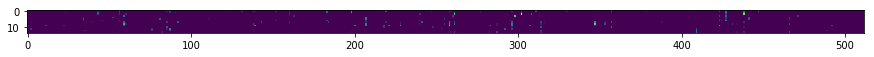

In [7]:
cnv6b = pred['cnv6b']
print cnv6b.shape
figure(figsize=(15,15))
imshow(cnv6b.reshape(-1,cnv6b.shape[-1]))

In [ ]:
figure(figsize=(15,15))
subplot(1,2,1); imshow(I)
subplot(1,2,2); imshow(normalize_depth_for_display(pred['depth'][0,:,:,0]))

In [ ]:
fh = open('misc/sample2.png', 'r')
I2 = pil.open(fh)
I2 = I2.resize((img_width*3, img_height), pil.ANTIALIAS)
I2 = np.array(I2)

In [ ]:
figure(figsize=(15,15))
imshow(I2)

In [ ]:
sfm.setup_inference(img_height,
                    img_width,
                    mode='pose')

In [ ]:
saver = tf.train.Saver([var for var in tf.model_variables()])
with tf.Session() as sess:
    saver.restore(sess, ckpt_file)
    pred = sfm.inference(I2[None,:,:,:], sess, mode='pose')

In [ ]:
pred

In [ ]:
pose = pred['pose'][0,:,:]

In [ ]:
pose[1,:] - pose[0,:]